#### Importing Necessary Libraries

In [1]:
from sklearn.datasets import load_digits #import the dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#### Loading Data

In [2]:
X, y = load_digits(return_X_y=True)

y = y.reshape(-1, 1)

print(X.shape, y.shape)

(1797, 64) (1797, 1)


#### Visualizing Data

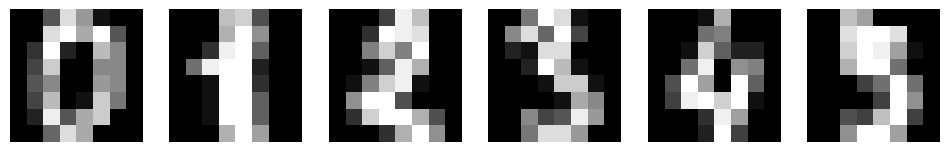

In [3]:
def displayImages(images):
    
    fig, axes = plt.subplots(1, 6, figsize=(12, 2))
    
    for i in range(6):
        axes[i].imshow(images[i].reshape(8,8), cmap='gray')
        axes[i].axis('off')
        
    plt.show()

displayImages(X)

#### Random shuffle of the data

In [4]:
index = np.arange(X.shape[0])

np.random.shuffle(index)

X = X[index]

y = y[index]

#### Scaling the dataset features using Standard Scaler

In [5]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

#### Applying one hot encoding to to targets

In [6]:
def one_hot_encode(y):
    
    y_encoded = np.zeros((y.shape[0], np.unique(y).shape[0]))
    
    for i in range(y.shape[0]):
        y_encoded[i][y[i]] = 1
        
    return y_encoded

y_encoded = one_hot_encode(y)

y_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1437, 64) (1437, 10) (360, 64) (360, 10)


#### Neural Network

In [8]:
class NeuralNetwork:
    def __init__(self, input_size, output_size, activation="sigmoid", hidden_size=30):
        
        # Initialize the neural network with the given input, output, and hidden layer sizes
        self.input_size = input_size
        
        self.output_size = output_size
        
        self.hidden_size = hidden_size

        # Initialize weights and biases for the input to hidden and hidden to output layers
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        
        self.bias_input_hidden = np.random.randn(hidden_size)
        
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        
        self.bias_hidden_output = np.random.randn(output_size)

        # Set the activation function based on the specified activation parameter
        self.set_activation(activation)
        
        self.activation_name = activation

    def set_activation(self, activation):
        # Set the activation function and its derivative based on the specified activation parameter
        if activation == "sigmoid":
            self.activation_fn = self.sigmoid
            self.activation_derivative_fn = self.sigmoid_derivative
            
        elif activation == "relu":
            self.activation_fn = self.relu
            self.activation_derivative_fn = self.relu_derivative
            
        elif activation == "tanh":
            self.activation_fn = self.tanh
            self.activation_derivative_fn = self.tanh_derivative
            
        else:
            raise ValueError("This activation function does not exist")

    # Activation functions and their derivatives
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    # Forward pass through the neural network
    def forward_pass(self, X):
        
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        
        self.hidden_layer_output = self.activation_fn(self.hidden_layer_input)
        
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_hidden_output
        
        self.output_layer_output = self.activation_fn(self.output_layer_input)
        
        return self.output_layer_output

    # Backward pass to update weights and biases based on the error
    def backward_pass(self, X, y, output, learning_rate):
        
        error = y - output
        
        output_delta = error * self.activation_derivative_fn(output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        
        hidden_delta = hidden_error * self.activation_derivative_fn(self.hidden_layer_output)

        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        
        self.bias_hidden_output += np.sum(output_delta, axis=0) * learning_rate
        
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        
        self.bias_input_hidden += np.sum(hidden_delta, axis=0) * learning_rate

    # Calculate the accuracy of the neural network
    def calculate_accuracy(self, X, y):
        
        predictions = np.argmax(self.forward_pass(X), axis=1)
        
        true_labels = np.argmax(y, axis=1)
        
        return np.mean(predictions == true_labels)

    # Calculate the loss of the neural network
    def loss(self, X, y):
        
        predictions = self.forward_pass(X)
        
        return np.mean((y - predictions) ** 2)

    # Train the neural network
    def fit(self, X, y, epochs=1000, learning_rate=0.001, plot=False):
        
        losses = []
        
        for _ in range(epochs):
            
            losses.append(self.loss(X, y))
            
            output = self.forward_pass(X)
            
            self.backward_pass(X, y, output, learning_rate)
        
        if plot:
            
            plt.plot(losses)
            
            plt.title(f"{self.activation_name.capitalize()} Activation Neural Network")
            
            plt.xlabel("Epoch")
            
            plt.ylabel("Loss")
            
            plt.show()


In [9]:
y_encoded.shape[1]

10

### Training and Testing Neural Network with different Activation Functions

#### Sigmoid Activation Function

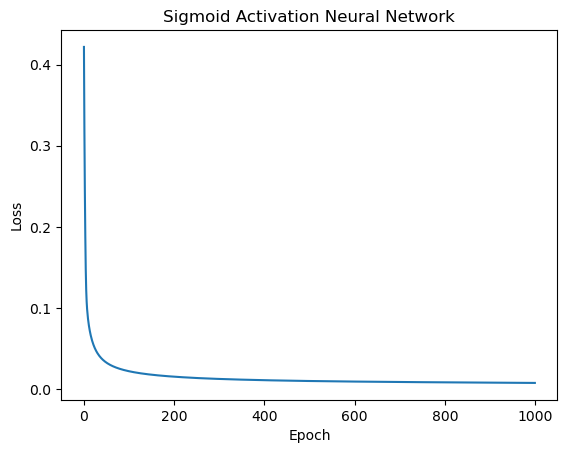

Train accuracy: 0.9694
Test accuracy: 0.9472


In [10]:
sigmoid_activation_nn = NeuralNetwork(input_size=X.shape[1], output_size=y_encoded.shape[1], activation="sigmoid")

sigmoid_activation_nn.fit(X_train, y_train, epochs=1000, learning_rate=0.001, plot=True)

sigmoid_train_accuracy = sigmoid_activation_nn.calculate_accuracy(X_train, y_train)

print("Train accuracy:", np.round(sigmoid_train_accuracy, 4))

sigmoid_test_accuracy = sigmoid_activation_nn.calculate_accuracy(X_test, y_test)

print("Test accuracy:", np.round(sigmoid_test_accuracy, 4))

#### ReLU Activation Function

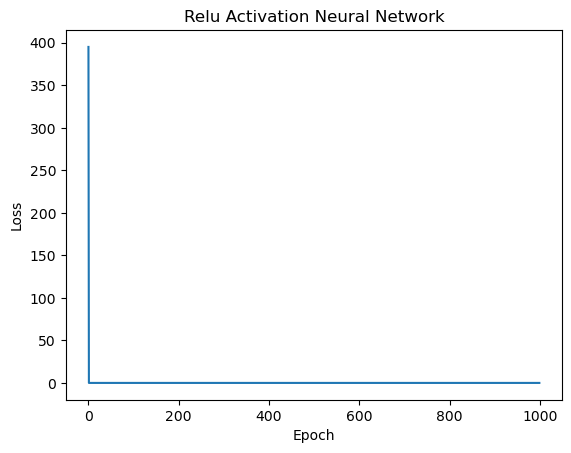

Train accuracy: 0.0981
Test accuracy: 0.1028


In [11]:
relu_activation_nn = NeuralNetwork(input_size=X.shape[1], output_size=y_encoded.shape[1], activation="relu")

relu_activation_nn.fit(X_train, y_train, epochs=1000, learning_rate=0.001, plot=True)

relu_train_accuracy = relu_activation_nn.calculate_accuracy(X_train, y_train)

print("Train accuracy:", np.round(relu_train_accuracy, 4))

relu_test_accuracy = relu_activation_nn.calculate_accuracy(X_test, y_test)

print("Test accuracy:", np.round(relu_test_accuracy, 4))

#### Tanh Activation Function

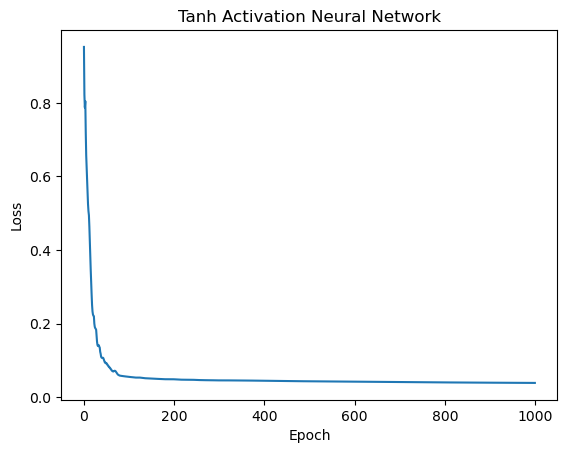

Train accuracy: 0.9436
Test accuracy: 0.9


In [12]:
tanh_activation_nn = NeuralNetwork(input_size=X.shape[1], output_size=y_encoded.shape[1], activation="tanh")

tanh_activation_nn.fit(X_train, y_train, epochs=1000, learning_rate=0.001, plot=True)

tanh_train_accuracy = tanh_activation_nn.calculate_accuracy(X_train, y_train)

print("Train accuracy:", np.round(tanh_train_accuracy, 4))

tanh_test_accuracy = tanh_activation_nn.calculate_accuracy(X_test, y_test)

print("Test accuracy:", np.round(tanh_test_accuracy, 4))


#### Trying with different hyper-parameters

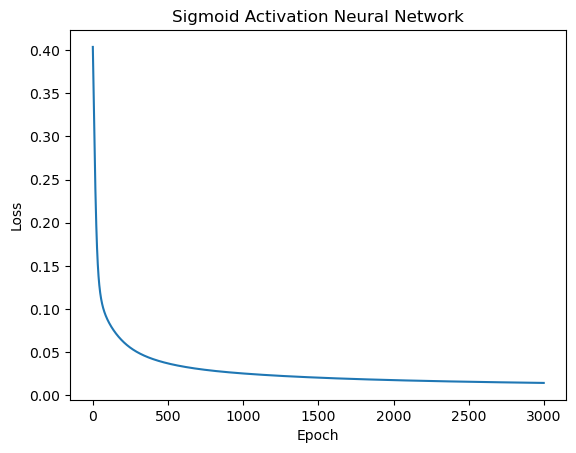

Train accuracy: 0.9374
Test accuracy: 0.9139


In [13]:
sigmoid2_activation_nn = NeuralNetwork(input_size=X.shape[1], output_size=y_encoded.shape[1], activation="sigmoid")

sigmoid2_activation_nn.fit(X_train, y_train, epochs=3000, learning_rate=0.0001, plot=True)

sigmoid2_train_accuracy = sigmoid2_activation_nn.calculate_accuracy(X_train, y_train)

print("Train accuracy:", np.round(sigmoid2_train_accuracy, 4))

sigmoid2_test_accuracy = sigmoid2_activation_nn.calculate_accuracy(X_test, y_test)

print("Test accuracy:", np.round(sigmoid2_test_accuracy, 4))

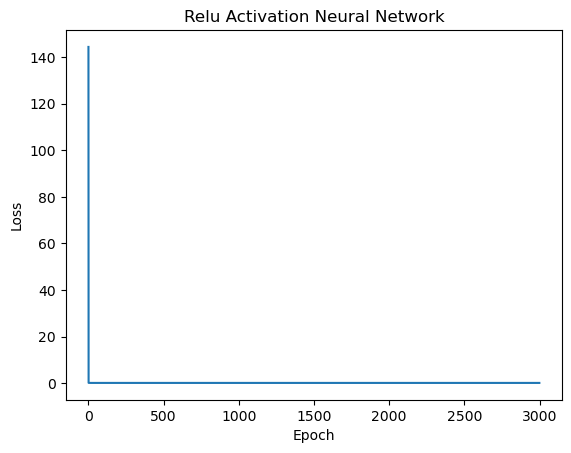

Train accuracy: 0.0981
Test accuracy: 0.1028


In [14]:
relu2_activation_nn = NeuralNetwork(input_size=X.shape[1], output_size=y_encoded.shape[1], activation="relu")

relu2_activation_nn.fit(X_train, y_train, epochs=3000, learning_rate=0.0001, plot=True)

relu2_train_accuracy = relu2_activation_nn.calculate_accuracy(X_train, y_train)

print("Train accuracy:", np.round(relu2_train_accuracy, 4))

relu2_test_accuracy = relu2_activation_nn.calculate_accuracy(X_test, y_test)

print("Test accuracy:", np.round(relu2_test_accuracy, 4))

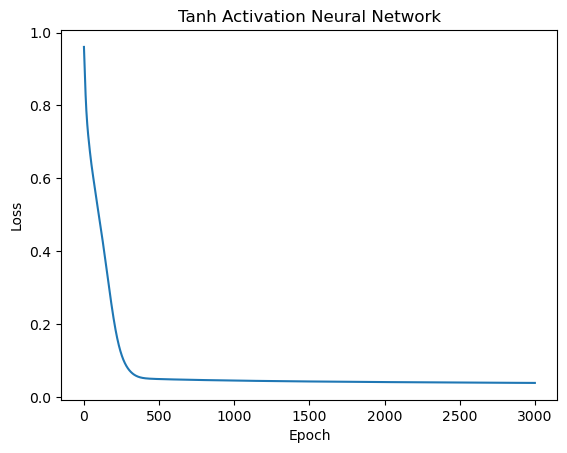

Train accuracy: 0.9172
Test accuracy: 0.8889


In [15]:
tanh2_activation_nn = NeuralNetwork(input_size=X.shape[1], output_size=y_encoded.shape[1], activation="tanh")

tanh2_activation_nn.fit(X_train, y_train, epochs=3000, learning_rate=0.0001, plot=True)

tanh2_train_accuracy = tanh2_activation_nn.calculate_accuracy(X_train, y_train)

print("Train accuracy:", np.round(tanh2_train_accuracy, 4))

tanh2_test_accuracy = tanh2_activation_nn.calculate_accuracy(X_test, y_test)

print("Test accuracy:", np.round(tanh2_test_accuracy, 4))


#### Findings

1. The Sigmoid function performs well when the learning rate is below 0.01 but struggles with higher rates. Therefore, I have opted for epochs=1000 and a learning rate of 0.001. Using a learning rate of 0.01 would require increasing epochs to 10000, which significantly increases the training time.

2. The ReLU activation function consistently produces subpar results, irrespective of the hyperparameters. This is because it outputs values between 0 and infinity, whereas our prediction range is between 0 and 1. This discrepancy adversely affects accuracy, despite achieving a low loss.

3. Tanh generally matches the performance of the sigmoid function and occasionally surpasses it. It can be seen that either sigmoid or tanh would be more suitable for addressing this particular problem